In [1]:
from exponential import *

In [2]:
params=[]
N=[]
E=[]
A=[]

for i in range(200):
    print(i)

    params.append(np.abs(np.array([mp.mpf(400),mp.mpf(1),mp.mpf(0.02)])*np.random.normal(1,1,3)))

    theparams=np.array(params).transpose()

    subspace=Subspace(len(params))

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(theparams)

    subspace.make_N_mat()
    subspace.make_H_mat()
    subspace.find_N_eigens()
    subspace.make_Y_mat()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()
    subspace.find_energy_eigenstates()

    E.append(subspace.energy_levels[0])
    N.append(subspace.dim)
    A.append(subspace.energy_eigenstates[0])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


KeyboardInterrupt: 

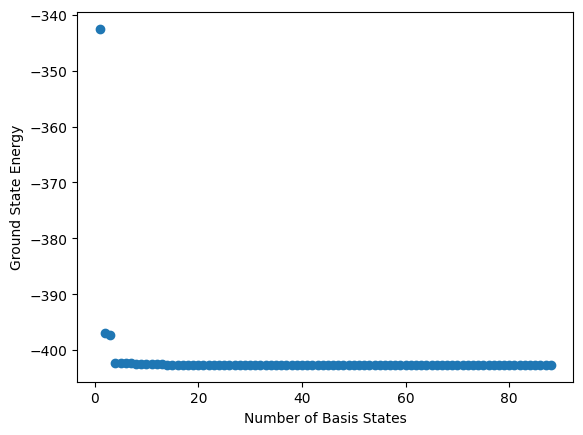

In [14]:
import matplotlib.pyplot as plt
plt.scatter(N,E)
plt.xlabel("Number of Basis States")
plt.ylabel("Ground State Energy")
plt.savefig("../figures/groundstatehighpres.png",dpi=600)

In [6]:
print(E[-1])

-402.6373009913886257351597819437019099429777068036062416025869461210506780080559801186655288913891063


In [7]:
def term(ai,bi,ci,aj,bj,cj):
    Ai=2*np.real(ai)+2*np.real(bi)
    Bi=2*np.real(ai)+2*np.real(ci)
    Ci=2*np.real(bi)+2*np.real(ci)
    Aj=2*np.real(aj)+2*np.real(bj)
    Bj=2*np.real(aj)+2*np.real(cj)
    Cj=2*np.real(bj)+2*np.real(cj)

    return (
        np.sqrt(Ai*Aj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Bi*Bj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Ci*Cj)/(np.conjugate(ai+bi)+aj+bj)
        *Ai*Bi*Ci/np.sqrt( Ai**2 * (Bi + Ci) + Bi**2 * (Ai + Ci) + Ci**2 * (Ai + Bi) + Ai*Bi*Ci)
        *Aj*Bj*Cj/np.sqrt( Aj**2 * (Bj + Cj) + Bj**2 * (Aj + Cj) + Cj**2 * (Aj + Bj) + Aj*Bj*Cj)
    )

In [8]:
def delta(Amplitudes,params):
    ais, ajs=np.meshgrid(params[0],params[0])
    bis, bjs=np.meshgrid(params[1],params[1])
    cis, cjs=np.meshgrid(params[2],params[2])
    Ampis,Ampjs=np.meshgrid(Amplitudes,Amplitudes)
    terms=term(ais,bis,cis,ajs,bjs,cjs)
    sum=np.sum(np.conjugate(Ampis)*Ampjs*terms)
    return sum/(4*np.pi)

In [9]:
np.array(params).transpose().shape

(3, 89)

In [10]:
D=[]
for i in range(len(N)):
    print(i)
    D.append(delta(A[i],np.array(params).transpose()[:,:i+1]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


Text(0, 0.5, 'delta funciton expectation')

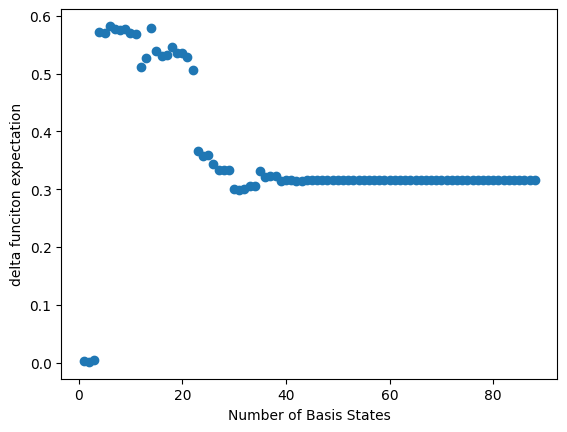

In [32]:
plt.scatter(N,D)
plt.xlabel("Number of Basis States")
plt.ylabel('delta funciton expectation')
#plt.savefig("../figures/groundstatehighpres.png",dpi=600)

In [57]:
print(D[-1])

0.3159037392414243255777200035604725777298988788863860810441293719980512939527656932671000640553687526


In [64]:
alpha=mp.mpf(cnst.alpha)

g2=mp.mpf(2)

g3=mp.mpf(2)

Hartree=mp.mpf(27.211386245981)

In [65]:
MHz_conversion_factor=mp.mpf(6.57968392061)*(mp.mpf(10)**mp.mpf(9))
def HFS(expdelta):
    prefactor=(
        (2*np.pi/(3))
        *(four_pi_epsilon0*hbar**4/(e**2))
        *alpha**2
        *(g2*g3/(m2*m3))
        )*MHz_conversion_factor
    return prefactor*expdelta

In [ ]:
print(HFS(D[-1]))

mpf('4484.61474416616189621171731450894588597762529888499687056291136367765337883210714901862284332019797314')